In [2]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as ms
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
import os

## Part 1: reading the data
Here we read the data in both the Health/ and the Infarcted/ folders, computing the mean gray value for each unit of time.

We then store the processed data in CSV files. To be able later to correctly label & display what we want, we also append at the end of each row the patient number, and the X-Y-Z coordinates of the point. The class (0 for healthy, 1 for infarcted) is also kept but not used later.


In [3]:
'''
Part 1: process data and save it to csv files
'''
healthy = []
types = []
k = 0
# Healthy data
for file in os.listdir("Healthy/"):
    gray_matrix = imread("Healthy/" + file)
    values=[]
    for i in range(0, gray_matrix.shape[1]):
        mean = 0
        for j in range(0, gray_matrix.shape[0]):
            mean += gray_matrix[j][i]
        mean /= gray_matrix.shape[0]
        values.append(mean)
    # Add the x - y - z values to the data
    filename_splitted = file.split(".")[0].split("_")
    values.append(int(filename_splitted[0])) # Patient number
    values.append(int(filename_splitted[1])) # x
    values.append(int(filename_splitted[2])) # y
    values.append(int(filename_splitted[3])) # z
    values.append(0) # Class
    healthy.append(values)
    types.append(0)
    if k % 100 == 0:
        print(k)
    # Progress bar
    k += 1

# Infarcted data
infarcted = []
for file in os.listdir("Infarcted/"):
    gray_matrix = imread("Infarcted/" + file)
    values=[]
    for i in range(0, gray_matrix.shape[1]):
        mean = 0
        for j in range(0, gray_matrix.shape[0]):
            mean += gray_matrix[j][i]
        mean /= gray_matrix.shape[0]
        values.append(mean)
    # Add the x - y - z values to the data
    filename_splitted = file.split(".")[0].split("_")
    values.append(int(filename_splitted[0])) # Patient number
    values.append(int(filename_splitted[1])) # x
    values.append(int(filename_splitted[2])) # y
    values.append(int(filename_splitted[3])) # z
    values.append(1) # Class
    healthy.append(values)
    types.append(1)
    # Progress bar
    if k % 100 == 0:
        print(k)
    k += 1
np.savetxt("data.csv", np.asarray(healthy), delimiter=",")
np.savetxt("labels.csv", types, fmt='%i', delimiter=",")

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [4]:
data = pd.read_csv("data.csv", header=None)
labels = pd.read_csv("labels.csv", header=None)

In [5]:
'''
Split training and testing values with a ratio of 30% (70% goes to training, 30% goes to testing)
'''
X_train, X_test, y_train, y_test = train_test_split(data[data.columns[:-5]], labels.values.ravel(), test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(17684, 60)
(4421, 60)


In [11]:
clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
cfm = confusion_matrix(clf.predict(X_test), y_test)
print(cfm)

[[1823  408]
 [ 392 1798]]


In [13]:
'''
Compute accuracy, false positives / negatives and error from the confusion matrix
'''
total = cfm[0][0] + cfm[1][0] + cfm[0][1] + cfm[1][1]
accuracy = (cfm[0][0] + cfm[1][1])/total
false_positives = cfm[0][1]/total
false_negatives = cfm[1][0]/total
errors = (cfm[0][1] + cfm[1][0])/total

print("Accuracy = " + str(accuracy))
print("False Positives = " + str(false_positives))
print("False Negatives = " + str(false_negatives))
print("Errors = " + str(errors))

Accuracy = 0.8190454648269623
False Positives = 0.09228681293824927
False Negatives = 0.08866772223478851
Errors = 0.18095453517303778


We observe here that we have aproximately 82% accuracy with a linear kernel (a RBF kernel gives us 87% accuracy, slightly better, but quite slower to compute. We also cannot compute the hyperplane with this kernel, so the following parts won't work). This is not bad, but we have to consider that we only have data for 4 patients. If we had more data, we would have had a better score. 

In [14]:
'''
Get distance of each point of the dataset to the hyperplane.
'''
y_test_pred = clf.decision_function(data[data.columns[:-5]])
w_norm = np.linalg.norm(clf.coef_)
dist = y_test_pred/w_norm
print("distance from hyperplane = " + str(dist))

distance from hyperplane = [-0.01402073 -0.06704176 -0.04141897 ...  0.00909026  0.03619664
  0.05855791]


The distance from hyperplane is computed here, and gives us either negative of positive values. Negative values represent class 0, healthy data points. Invertly, positive values represent class 1, infarcted data points.

When the distance is close to 0, the probability to be in the corresponding class tends to 50%, and invertly the further away it goes from 0, the closer it gets to 100% (100% being the minimum for class 0 and maximum for class 1).

The following code translates this distance to percentages. We keep negative percentages to differentiate between the 2 classes.

In [15]:
min_val = np.min(dist)
max_val = np.max(dist)
'''
Compute probability to be in a class. Invert probability if on second class (for colors displaying)
'''
values_percent = []
for i in dist:
    if i > 0: # Class 1: Infarcted
        percent = 50 + 50*i/max_val
        values_percent.append(percent)
    if i < 0: # Class 0: healthy
        i_tmp = -i
        percent = 50 + 50*i_tmp/(-min_val)
        values_percent.append(-percent)
data_np = data.to_numpy()
# Append percentages to the data
data_np = np.append(data_np, np.array(values_percent).reshape(np.array(values_percent).shape[0], 1), axis=1)
print(data_np.shape)


(22105, 66)


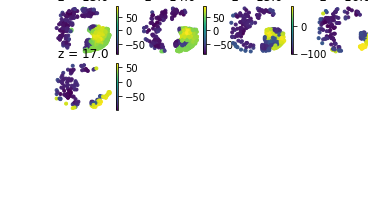

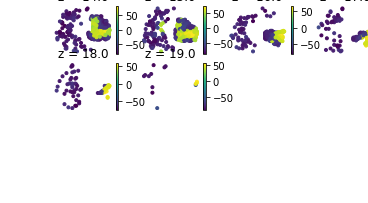

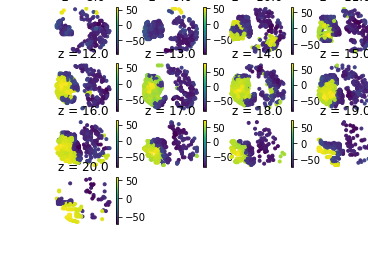

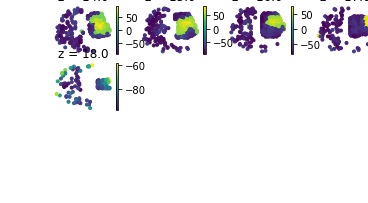

In [16]:

# Split data by patient number
indices = np.argsort(data_np[:, -6])
arr_temp = data_np[indices]
data_by_patient = np.array_split(arr_temp, np.where(np.diff(arr_temp[:,-6]) != 0 )[0]+1)

'''
For each patient, display all the z cuts of the brain
'''
for k in range(0, len(data_by_patient)):
    # Split patient data by z
    patient = data_by_patient[k]
    indices_z = np.argsort(patient[:, -3])
    arr_temp_z = patient[indices_z]
    data_by_patient_by_z = np.array_split(arr_temp_z, np.where(np.diff(arr_temp_z[:,-3]) != 0 )[0]+1)
    '''
    Display all the z cuts
    '''
    for i in range(1, len(data_by_patient_by_z)+1):
        # Get x and y axis
        x = data_by_patient_by_z[i-1][:,-5]
        y = data_by_patient_by_z[i-1][:,-4]
        # Percentages will be our colors, from -100% to +100% (-100% is class 0, +100% is class 1)
        percentages = data_by_patient_by_z[i-1][:,-1]
        plt.subplot(4, 4, i)
        plt.scatter(x, y, marker='.', c=percentages, label=percentages)
        plt.colorbar()
        plt.grid(False)
        plt.axis(False)
        plt.title("z = " + str(data_by_patient_by_z[i-1][:,-3][0]))
    plt.suptitle("Patient ID " + str(data_by_patient_by_z[0][:,-6][0]))
    plt.show()


Let's analyze the data we obtain.

We can see that the infarcted zone forms a sort of bubble, where the center is yellow and progressively goes to green values at the edges, whereas healthy regions are violet.

For patients 48, 170 and 260, the infarcted area is located on the right side of the brain, while patient 249 has it on the left side. For all patients, small infarcted areas appear on both sides but do not seem to have any link to the main infarcted area.

The patient 249 clearly has the most damaged area while the 3 others have smaller infarcted areas.